Tristan Curry \
ECE 9603 - Assignment 1 \
October 20th 2023

In [1]:
# import all required packages for the file
import numpy as np
import statistics
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import sklearn
import pandas as pd

from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models, losses, datasets
from keras.utils import np_utils
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn import preprocessing

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

## 1. Format Dataset from .csv file

Standard Deviation of outputs =  58.512679394406476


Text(0.5, 0, 'CO2 Emissions')

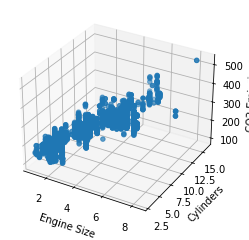

In [2]:
# import data from .csv and extract feature data and labels
importedData = pd.read_csv("CO2_Emissions_Canada.csv")
importedData.head(7386)
inputData = importedData[["Engine Size", "Cylinders", "Fuel Consumption Comb L/100 km"]]
outputs = importedData["CO2 Emissions"]
var_output = statistics.stdev(outputs)
print("Standard Deviation of outputs = ", var_output)

fig=plt.figure()
ax = fig.add_subplot(111, projection = "3d")
n = 100
ax.scatter(inputData["Engine Size"],inputData["Cylinders"],outputs)
ax.set_xlabel("Engine Size")
ax.set_ylabel("Cylinders")
ax.set_zlabel("CO2 Emissions")


## 2. Construct model for classification - Neural Networks

In [3]:

# assign data to test and train data sets
x_train, x_test, y_train, y_test = train_test_split(inputData, outputs, test_size = 0.2, random_state = 109)

# normalize the feature data independently
normalizer = tf.keras.layers.Normalization(axis = -1)
normalizer.adapt(np.array(x_train))

# define model and parameters
epochs = 100

model = keras.Sequential([
    normalizer,
    layers.Dense(2048, activation = "relu"),
    layers.Dense(2048, activation = "relu"),
    layers.Dense(1024, activation = "relu"),
    layers.Dense(256),
])

#compile the model
model.compile(loss='mean_absolute_error', optimizer = "adam", metrics=['accuracy'])

# train model on the training data
trained = model.fit(x_train,y_train,epochs=epochs,validation_split=0.2,verbose=1)



Epoch 1/100
148/148 [==============================] - 5s 32ms/step - loss: 53.6928 - accuracy: 0.0032 - val_loss: 11.0188 - val_accuracy: 0.0000e+00
Epoch 2/100
148/148 [==============================] - 5s 30ms/step - loss: 10.7486 - accuracy: 0.0036 - val_loss: 9.0141 - val_accuracy: 0.0000e+00
Epoch 3/100
148/148 [==============================] - 5s 31ms/step - loss: 10.2737 - accuracy: 0.0030 - val_loss: 8.7438 - val_accuracy: 0.0000e+00
Epoch 4/100
148/148 [==============================] - 5s 31ms/step - loss: 10.0533 - accuracy: 0.0023 - val_loss: 10.9708 - val_accuracy: 0.0000e+00
Epoch 5/100
148/148 [==============================] - 5s 31ms/step - loss: 8.6237 - accuracy: 0.0013 - val_loss: 7.9399 - val_accuracy: 0.0000e+00
Epoch 6/100
148/148 [==============================] - 5s 31ms/step - loss: 8.4749 - accuracy: 0.0015 - val_loss: 6.2543 - val_accuracy: 0.0076
Epoch 7/100
148/148 [==============================] - 5s 31ms/step - loss: 7.9164 - accuracy: 0.0019 - val_lo

148/148 [==============================] - 5s 32ms/step - loss: 5.3087 - accuracy: 4.2319e-04 - val_loss: 4.7953 - val_accuracy: 0.0000e+00
Epoch 57/100
148/148 [==============================] - 5s 32ms/step - loss: 5.4876 - accuracy: 0.0030 - val_loss: 5.7690 - val_accuracy: 8.4602e-04
Epoch 58/100
148/148 [==============================] - 5s 32ms/step - loss: 5.7761 - accuracy: 0.0025 - val_loss: 5.7164 - val_accuracy: 0.0000e+00
Epoch 59/100
148/148 [==============================] - 5s 32ms/step - loss: 5.4688 - accuracy: 0.0017 - val_loss: 6.1669 - val_accuracy: 0.0076
Epoch 60/100
148/148 [==============================] - 5s 32ms/step - loss: 5.3273 - accuracy: 0.0023 - val_loss: 4.4619 - val_accuracy: 0.0042
Epoch 61/100
148/148 [==============================] - 5s 32ms/step - loss: 5.3122 - accuracy: 0.0028 - val_loss: 4.6182 - val_accuracy: 0.0000e+00
Epoch 62/100
148/148 [==============================] - 5s 32ms/step - loss: 5.8239 - accuracy: 0.0023 - val_loss: 5.0906 -

In [4]:

# predict data based on model and test data

predicted = model.evaluate(x_test, y_test)

47/47 [==============================] - 0s 6ms/step - loss: 4.5826 - accuracy: 0.0041


Text(0, 0.5, 'Accuracy')

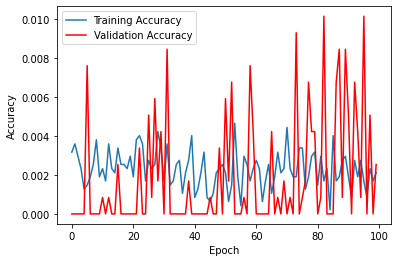

In [5]:
# plotting the accuracy from the outcome

plt.plot(trained.history["accuracy"])
plt.plot(trained.history["val_accuracy"],"r")
plt.legend(["Training Accuracy", "Validation Accuracy"])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


Text(0, 0.5, 'Loss value')

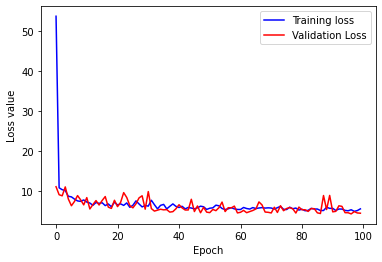

In [6]:
# plotting predicted output loss

plt.plot(trained.history["loss"],"b")
plt.plot(trained.history["val_loss"],"r")
plt.legend(["Training loss", "Validation Loss"])
plt.xlabel('Epoch')
plt.ylabel('Loss value')

## 3. SVR forecasting

In [7]:
# assign data to test and train data sets
x_train, x_test, y_train, y_test = train_test_split(inputData, outputs, test_size = 0.2, random_state = 109)

# using a polynomial SVM
polySVR = SVR(kernel='rbf', gamma = 'scale', C=1, verbose=1)

In [8]:
# fit the data using the SVR
hist = polySVR.fit(x_train, y_train)

[LibSVM]

In [9]:
# predict using the SVR and test data
y_pred = polySVR.predict(x_test)

score = polySVR.score(x_test, y_test)

MSE = metrics.mean_squared_error(y_test, y_pred)
MAE = metrics.mean_absolute_error(y_test, y_pred)

print("Coefficient of prediction = ", score)
print("Mean sum of squares Error: ", MSE)
print("Mean absolute error: ", MAE)

Coefficient of prediction =  0.8997212522951404
Mean sum of squares Error:  336.63241115104324
Mean absolute error:  7.538633511783666


## 4. Multivariate Regression Forecasting

In [10]:
# assign data to test and train data sets
x_train, x_test, y_train, y_test = train_test_split(inputData, outputs, test_size = 0.2, random_state = 109)

# create Multivariate regression model and train
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [11]:
# predict outcomes based on test data and calculate metrics
MVtest = regr.predict(x_test)

MSE = metrics.mean_squared_error(y_test,MVtest)
MAE = metrics.mean_absolute_error(y_test,MVtest)
R2Score = r2_score(MVtest, y_test)

slope = regr.coef_
intercept = regr.intercept_
num_features = regr.n_features_in_

print("Mean absolute error: ", MAE)
print("Mean sum of squares: ", MSE)
print("R2-Score: ", R2Score)

print("Slope: ", slope)
print("Intercept", intercept)
print("Num features seen: ", num_features)

Mean absolute error:  13.092323885764843
Mean sum of squares:  395.01893361999333
R2-Score:  0.865284168048917
Slope:  [ 5.49879211  6.46053458 13.26365292]
Intercept 51.26068927770646
Num features seen:  3


Text(0, 0.5, 'CO2 Emissions')

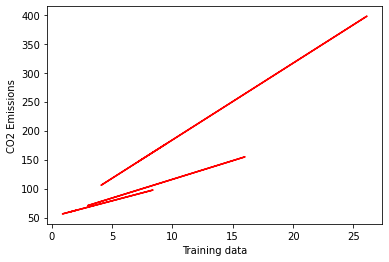

In [17]:
# plotting

#plt.scatter(inputData[["Engine Size", "Cylinders"]], color="blue")

plt.plot(x_train, slope*x_train + intercept, '-r')

plt.xlabel("Training data")
plt.ylabel("CO2 Emissions")